<a href="https://colab.research.google.com/github/Atheer03/labs/blob/main/w2_e1_e2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab Overview:**

In this lab, you will complete two optimization exercises and learn how to solve problems using the graphical solution method and linear programming using `scipy` and `pulp`.

**In the first exercise**, the problem has been solved using the graphical solution method and linear programming method with `pulp`, and your task is to solve it with `scipy` in section 1.4.1.

**In the second exercise**, the problem has been solved using the linear programming method with `scipy`, and your task is to solve it using the the graphical solution method (in section 2.3), and to usae the linear programming method with `pulp` (in section 2.4.2).


# 1. Exercise 1:

## 1.1 Problem Description

A company manufactures two products: X and Y. To manufacture each product, it has to go through three machines: A, B, and C. Manufacturing X require 3 hours in machine A, 9 hours in machine B, and 2 hours in machine C. Similarly, manufacturing product Y require 2, 4, and 10 hours in machines A, B, and C respectively. The availability of each of the machines A, B, and C during a manufacturing period are 66, 180, and 200 hours respectively. The profit per product X is USD 90 and that per product Y is USD 75. How many units of X and Y should be produced during a production period to **maximize profit**?

---


## 1.2 Optimization Problem Formulation


There will be two variables:
*   $x_1$ : Number of Product X to be produced
*   $x_2$ : Number of Product Y to be produced

Objective function:
*   Profit = $90 x_1 + 75 x_2$

Constraints:
*   Machine A: $ 3 x_1 + 2 x_2 \le 66$
*   Machine B: $ 9 x_1 + 4 x_2 \le 180$
*   Machine C: $ 2 x_1 +10 x_2 \le 200$
*   $ x_1 \ge 0$
*   $ x_2 \ge 0$

Objective: maximize the profit subject to the given constraints


Solve the given linear programming problem:
$$
\begin{align}
\max_{x_1,x_2} \quad & P = 90 x_1 + 75 x_2 \\
\textrm{s.t.}  \quad & 3 x_1 + 2 x_2 \le 66 \\
 & 9 x_1 + 4 x_2 \le 180 \\
 & 2 x_1 +10 x_2 \le 200 \\
 & x_1 >= 0 \\
 & x_2 >= 0
\end{align}
$$


## 1.3 Graphical Solution using Corner Point Method

To solve the problem using the corner point method, you need to follow the following steps:

**Step 1:** Create a mathematical formulation from the given problem. If not given.

**Step 2:** Now, plot the graph using the given constraints and find the feasible region.

**Step 3:** Find the coordinates of the feasible region(vertices) from step 2.

**Step 4:** Evaluate the objective function at each corner point of the feasible region. Assume $N$ and $n$ denote the largest and smallest values of these points.

**Step 5:** If the feasible region is bounded, then $N$ and $n$ are the maximum and minimum values of the objective function. Or if the feasible region is unbounded, then:

*   $N$ is the maximum value of the objective function if the open half plan is got by the $ax + by > N$ and has no common point to the feasible region. Otherwise, the objective function has no solution.
*   $n$ is the minimum value of the objective function if the open half plan is got by the $ax + by < n$ and has no common point to the feasible region. Otherwise, the objective function has no solution.



Here, we already have the mathematical formula for the objective function. Note that we can only show two variables: $x_1$ and $x_2$. We will assume that $x_2$ is on the $y$-axis. To be able to plot the constraints, we have to re-arrange the given constraints into the form: $x_2>=x_1$. Hence:
$$
\begin{align}
x_2 & \le \frac{66 - 3 x_1}{2} & = 33 - 1.5x_1 \\
x_2 & \le \frac{180 - 9 x_1}{4}   & = 45 - 2.25x_1 \\
x_2 & \le \frac{200 - 2 x_1}{10}   & = 20 - 0.2x_1
\end{align}
$$

We can plot them directly as follows using `matplotlib`.

In [2]:
## import the required libraries
import matplotlib.pyplot as plt
import numpy as np

x1 values to be used for plotting: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


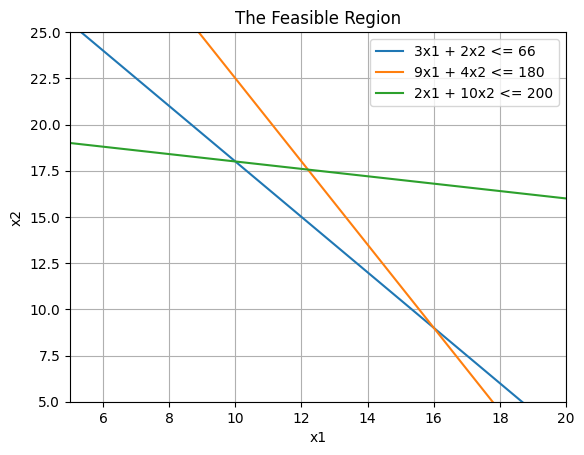

In [3]:
## Plot each contraint line

#### Define some points for x1
x = np.arange(0,60)
print("x1 values to be used for plotting:",x)

#### (optional) Get a handle for your figure and axis
fig, ax = plt.subplots()

#### plot function simply gets two arrays: x-axis and y-axis coordinates.
####    We also add a label for each constraint for reference
ax.plot(x, 33 - 1.5 * x, label = '3x1 + 2x2 <= 66')
ax.plot(x, 45 - 2.25 * x, label= '9x1 + 4x2 <= 180')
ax.plot(x, 20 - 0.2 * x, label= '2x1 + 10x2 <= 200')

#### some settings for the graph:
####    min, max and label for each axis
####    show the grid and legend
ax.set_xlim([5, 20])
ax.set_ylim([5, 25])
ax.set(title="The Feasible Region", xlabel="x1", ylabel="x2")
ax.grid(True)
ax.legend()

#### show the figure
plt.show()

However, we want to click on the graph to get the coordinates of the intersection points to define the feasible region.

Such graph is known as an interactive graph. For this, we need to use `ipympl` as our output channel in Colab. It is not available by default, so we need to install it first.

In [4]:
## install ipyml
!pip install ipympl

## import the handle for the output channel
from google.colab import output

## enable third-party widget on jupyter
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00


In [5]:
## activate the ipymlp backend
%matplotlib ipympl

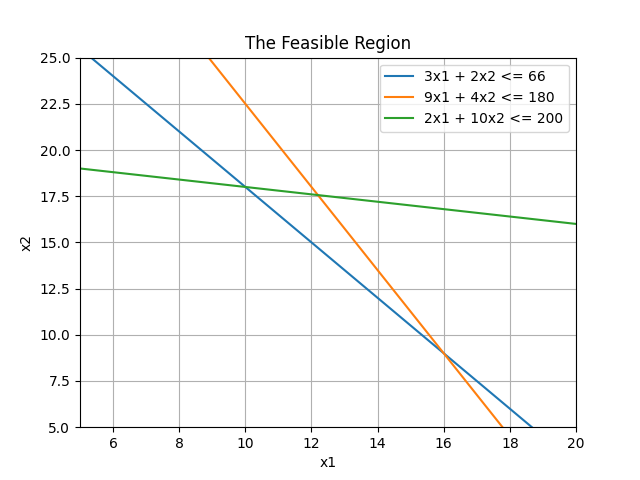

In [6]:
## get the figure and axis handeles
fig2, ax2 = plt.subplots()

## define a callback function to be called once the user clicked on the figure
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("x1=", ix, "x2=", iy)

## connect the callback function to the event manager
cid = fig2.canvas.mpl_connect('button_press_event', onclick)

## plot the constraints and fix your graph settings as before
ax2.plot(x, 33 - 1.5 * x, label = '3x1 + 2x2 <= 66')
ax2.plot(x, 45 - 2.25 * x, label= '9x1 + 4x2 <= 180')
ax2.plot(x, 20 - 0.2 * x, label= '2x1 + 10x2 <= 200')

#### some settings for the graph:
####    min, max and label for each axis
####    show the grid and legend
ax2.set_xlim([5, 20])
ax2.set_ylim([5, 25])
ax2.set(title="The Feasible Region", xlabel="x1", ylabel="x2")
ax2.grid(True)
ax2.legend()

plt.show()


Now, click the figure above on the corner points of the feasible region. Then, evaluate the objective function on them.

In [7]:
## get coordinates of the feasible region into a seperate arrays: x1 values and x2 values
corners_x1 = np.array([5, 9.99, 15.977, 17.762])
corners_x2 = np.array([19.026, 18.052, 8.961, 5.011])

## evaluate the objective function for all corner points in a single vector computation
P = 90 * corners_x1 + 75 * corners_x2
print(P)

[1876.95  2253.    2110.005 1974.405]


In [ ]:
## print the values for x1 and x2 that gives the minimum Z value.
####  Z.argmin returns the index where Z has the mimimum value.
####  then, use the return index to get the x1 and x2 value at that index
max_index = P.argmax()
print("solutions: x1=" , corners_x1[max_index], ", x2=", corners_x2[max_index])

print("solutions (rounded): x1= %.0f, x2= %.0f" % (corners_x1[max_index], corners_x2[max_index]))

solutions: x1= 9.99 , x2= 18.052
solutions (rounded): x1= 10, x2= 18


**The optimal solution is when $x_1=10$ and $x_2=18$** .


## 1.4 Using Python Libraries

Most linear programming and mixed-integer linear programming tools commonly in use are originally developed in Fortran, C, or C++. This is due to the computationally demanding nature of working with large matrices, which is typical in linear programming. These tools are known as **solvers**. In Python, the available tools primarily serve as interfaces or *wrappers* for these solvers.

Essentially, in defining and solving a model, you employ Python functions or methods to invoke a lower-level library. This library performs the actual optimization task and then delivers the solution back to your Python object.

In this session, I will introduce you to:


*   [SciPy](https://docs.scipy.org/doc/scipy/reference/optimize.html)
*   [PuLP](https://www.coin-or.org/PuLP/solvers.html)



### 1.4.1 Using SciPy (`scipy.optimize`)

Apply the steps and modify your problem as describe in **Section 2.4.1** below.

Convert maximization into minimization the negative:  max 𝑍=min −𝑍 . For example:  max 𝑍=𝑥+𝑦 it will be  min −𝑍=−𝑥−𝑦
Convert  ≥  into  −< :     



In [ ]:
# Please add your code here
from scipy.optimize import linprog

minmize

-90x1 - 75x2

constraints :

-3x1 - 2x2< -66


In [ ]:

# Define the objective coefficients for maximization (convert to minimization by negating)
obj = np.array([-90, -75])  # Maximize P = 90x1 + 75x2 -> Minimize -P = -90x1 - 75x2

# Inequality constraints (lhs_ineq * [x1, x2] <= rhs_ineq)
lhs_ineq = np.array([
    [3, 2],   # 3x1 + 2x2 <= 66
    [9, 4],   # 9x1 + 4x2 <= 180
    [2, 10]   # 2x1 + 10x2 <= 200
])

rhs_ineq = np.array([66, 180, 200])

# Bounds for x1 and x2
bnd = [(0, np.inf),  # x1 >= 0
       (0, np.inf)]  # x2 >= 0


In [ ]:
## find the optimal solution, if exist, where the input is as follows:
# c @ x
# such that
#     A_ub @ x <= b_ub
#     A_eq @ x == b_eq
#     lb <= x <= ub

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")
opt


<ipython-input-10-1fd7f4b0f0f6>:8: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -2250.0
       x: [ 1.000e+01  1.800e+01]
     nit: 3

In [ ]:
print(opt.x)

[10. 18.]


### 1.4.2 Using PuLP (`pulp`)
First, you need to install. Then import what you need from it.

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 29.6 MB/s eta 0:00:00


In [ ]:
from pulp import *

You will follow these steps:


1.   Create your `LpProblem`. Here, you have to identify what type of optimization are you performing in the `sense` argument either: `LpMaximize` or `LpMinimize`
2.   Define the decision variables as instances of the `LpVariable` and specify their lower/upper bounds. Default for the `lowBound` is negative infinity and for `upBound` is positive infinity. Also, you can specify whether its continuous or discrete.
3.   Define the objective function and constraints and add them to your model created in step 1.
4.   Solve your problem and print your results.


In [ ]:
# 1. Create the model
model = LpProblem(name="w2e1-problem", sense=LpMaximize)

# 2. Initialize the decision variables
x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)

# 3. Add the objective function and the constraints to the model
model += (90 * x1 + 75 * x2)        ### objective function
model += (3 * x1 + 2 * x2 <= 66)    ### constraint 1
model += (9 * x1 + 4 * x2 <= 180)   ### constraint 2
model += (2 * x1 + 10 * x2 <= 200)    ### constraint 3

In [ ]:
## check the model content
model

w2e1-problem:
MAXIMIZE
90*x1 + 75*x2 + 0
SUBJECT TO
_C1: 3 x1 + 2 x2 <= 66

_C2: 9 x1 + 4 x2 <= 180

_C3: 2 x1 + 10 x2 <= 200

VARIABLES
x1 Continuous
x2 Continuous

In [ ]:
# 4. Solve the probelm and print your result
status = model.solve()

In [ ]:
print('status:', LpStatus[model.status])
print('objective:', model.objective.value())

for var in model.variables():
  print(var.name, ":", var.value())

status: Optimal
objective: 2250.0
x1 : 10.0
x2 : 18.0


In [ ]:
model.solver.toDict()

{'solver': 'PULP_CBC_CMD',
 'mip': True,
 'msg': True,
 'keepFiles': False,
 'warmStart': False,
 'timeMode': 'elapsed'}

For the given problem, the model determines that 10 items of X and 18 items of Y are optimal to maximize the profit of the company, which is $2250 in this case.



---





# 2. Exercise 2:
Solve the following LP problem using both graphical method and Python PuLP.



## 2.1 Problem Description
 There is no scenario provided for this problem. Go to the next section directly.



--------- me

## 2.2 Optimization Promlem Formulation


$$
\begin{align}
 \min_{x_1,x_2}~Z  = 60x_1 + 50x_2 & \\
s.t.~~~ 4x_1 + 4x_2 & \ge 10 \\
 2 x_1 + x_2 & \ge 4 \\
6 x_1 + 2x_2 & \le 12 \\
 x_1 & \ge 0 \\
 x_2 & \ge 0
\end{align}
$$

## 2.3 Using Graphical Method
Apply the steps from **Section 1.3**  above on this problem

In [33]:
# Please add your code here
## import the required libraries
import matplotlib.pyplot as plt
import numpy as np

To solve the problem using the corner point method, you need to follow the following steps:

Step 1: Create a mathematical formulation from the given problem. If not given.

Step 2: Now, plot the graph using the given constraints and find the feasible region.

Step 3: Find the coordinates of the feasible region(vertices) from step 2.

Step 4: Evaluate the objective function at each corner point of the feasible region. Assume  𝑁  and  𝑛  denote the largest and smallest values of these points.

Step 5: If the feasible region is bounded, then  𝑁  and  𝑛  are the maximum and minimum values of the objective function.

Or if the feasible region is unbounded, then:

     𝑁  is the maximum value of the objective function if the open half plan is got by the  𝑎𝑥+𝑏𝑦>𝑁  and has no common point to the feasible region. Otherwise, the objective function has no solution.

     𝑛  is the minimum value of the objective function if the open half plan is got by the  𝑎𝑥+𝑏𝑦<𝑛  and has no common point to the feasible region. Otherwise, the objective function has no solution.

------

x1 values to be used for plotting: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


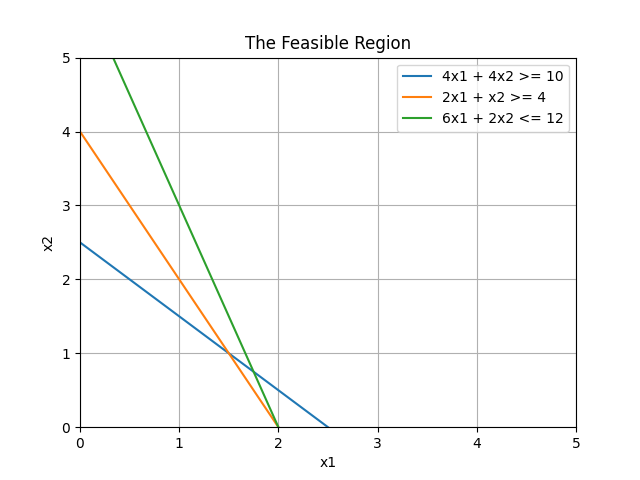

In [34]:
# Define some points for x1
x = np.arange(0, 60)
print("x1 values to be used for plotting:", x)

# (Optional) Get a handle for your figure and axis
fig, ax = plt.subplots()

# Plot each constraint line
ax.plot(x, (10 - 4 * x) / 4, label='4x1 + 4x2 >= 10')
ax.plot(x, 4 - 2 * x, label='2x1 + x2 >= 4')
ax.plot(x, (12 - 6 * x) / 2, label='6x1 + 2x2 <= 12')

# Some settings for the graph
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set(title="The Feasible Region", xlabel="x1", ylabel="x2")
ax.grid(True)
ax.legend()

# Show the figure
plt.show()

-- However, we want to click on the graph to get the coordinates of the intersection points to define the feasible region.
Such graph is known as an interactive graph. For this, we need to use ipympl as our output channel in Colab. It is not available by default, so we need to install it first

In [35]:
## install ipyml
!pip install ipympl

## import the handle for the output channel
from google.colab import output

## enable third-party widget on jupyter
output.enable_custom_widget_manager()

In [36]:
## activate the ipymlp backend
%matplotlib ipympl

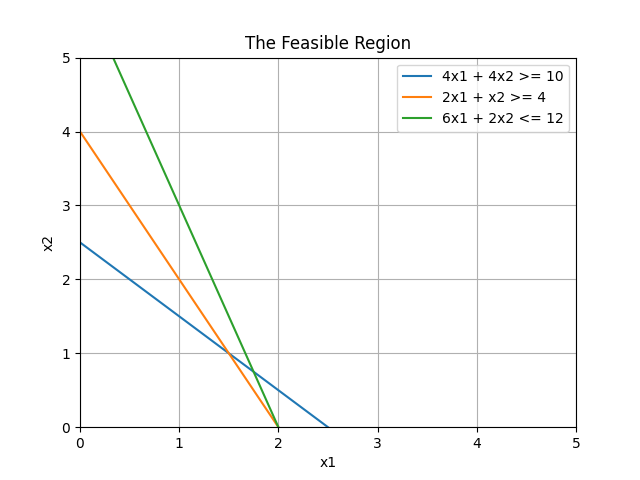

x1= 1.99 x2= 0.0
x1= 1.74 x2= 0.76
x1= 1.5 x2= 1.0


In [37]:
# Get the figure and axis handles
fig2, ax2 = plt.subplots()

# Define a callback function to be called once the user clicks on the figure
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("x1=", round(ix, 2), "x2=", round(iy, 2))

# Connect the callback function to the event manager
cid = fig2.canvas.mpl_connect('button_press_event', onclick)

# Plot the constraints and fix your graph settings as before
ax2.plot(x, (10 - 4 * x) / 4, label='4x1 + 4x2 >= 10')
ax2.plot(x, 4 - 2 * x, label='2x1 + x2 >= 4')
ax2.plot(x, (12 - 6 * x) / 2, label='6x1 + 2x2 <= 12')

# Some settings for the graph
ax2.set_xlim([0, 5])
ax2.set_ylim([0, 5])
ax2.set(title="The Feasible Region", xlabel="x1", ylabel="x2")
ax2.grid(True)
ax2.legend()

plt.show()

// Now, click the figure above on the corner points of the feasible region. Then, evaluate the objective function on them.       هذا على اساس الاحداثيات حقتي

In [94]:
# Get coordinates of the feasible region into separate arrays: x1 values and x2 values
corners_x1 = np.array([1.99, 1.75, 1.5])  # Filtered feasible points
corners_x2 = np.array([0.0, 0.75, 1.0])

In [95]:
# Function to check if points satisfy constraints
def satisfies_constraints(x1, x2):
    return (4 * x1 + 4 * x2 >= 10 and  # Constraint 1
            2 * x1 + x2 >= 4 and      # Constraint 2
            6 * x1 + 2 * x2 <= 12)    # Constraint 3

# Filter points that satisfy all constraints
feasible_points = [(x1, x2) for x1, x2 in zip(corners_x1, corners_x2) if satisfies_constraints(x1, x2)]
feasible_x1 = np.array([p[0] for p in feasible_points])
feasible_x2 = np.array([p[1] for p in feasible_points])

# Evaluate the objective function for feasible points
P = 60 * feasible_x1 + 50 * feasible_x2
print(P)  # Print the objective function values

[142.5 140. ]


In [96]:
# Find the index of the minimum objective value
min_index = P.argmin()

# Print the optimal x1 and x2 values
print("Solutions: x1=", feasible_x1[min_index], ", x2=", feasible_x2[min_index])

# Print the rounded optimal solution
print("Solutions (rounded): x1= %.2f, x2= %.2f" % (feasible_x1[min_index], feasible_x2[min_index]))

Solutions: x1= 1.5 , x2= 1.0
Solutions (rounded): x1= 1.50, x2= 1.00


**The optimal solution is when $x_1=1.5$ and $x_2=1$**

## 2.4 Using Python Libraries

### 2.4.1 Using SciPy (`scipy.optimize`)

To define and solve optimization problems with SciPy, you need to import `scipy.optimize.linprog()`

In [ ]:
from scipy.optimize import linprog

`linprog()` solves *only* minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign ($\ge$). Hence, we need to modify our problem first:


*   **Convert maximization into minimization the negative**: $\max~Z = \min~-Z$. For example: $\max~Z=x+y$ it will be $\min~-Z=-x-y$
*   **Convert $\ge$ into $-<$**:
$$
\begin{align}
4 x_1 + 4 x_2 \ge 10 & \equiv & -4 x_1 - 4 x_2 < -10\\
2 x_1 + x_2 \ge 4    & \equiv & -2 x_1 - x_2 < -4\\
\end{align}
$$

Now , we have a new LP problem:

$$
\begin{align}
&\min_{x_1,x_2} \quad  Z = 60 x_1 + 50 x_2 \\
&\textrm{s.t.}  \quad  & -4 x_1 - 4 x_2 & < -10 \\
 & &-2 x_1 - x_2 & < -4 \\
 & & 6 x_1 + 2 x_2 & \le 12 \\
 & & x_1 & \ge 0 \\
 & & x_2 & \ge 0
\end{align}
$$

Next, we will define our input for the model in terms of matrices and vectors as follows:


1.   Coefficients of $x_1$ and $x_2$ in the objective function as: $obj = \begin{bmatrix} 60 & 50 \end{bmatrix}$. Each column corresponds to a single decision variable.
2.   Coefficients of $x_1$ and $x_2$ in all inequality constraints as: $lhs = \begin{bmatrix} -4 & -4 \\
-2 & -1 \\
6 & 2\end{bmatrix}$ and $rhs = \begin{bmatrix} -10 \\ -4 \\ 12\end{bmatrix}$. Be careful with the order of rows and columns! The order of the rows for the left and right sides of the constraints must be the same. Each row represents one constraint. The order of the coefficients from the objective function and left sides of the constraints must match.
3. If you have equality constraints, they must be defined in a seperate LHS matrix and RHS vector as well.
4. Non-negativity constraints are defines as bounds on the variables.




In [ ]:
## define the input
obj = np.array([60, 50])      # no change already min -- in the other must be negtive
lhs_ineq = np.array( [ [ -4, -4],
                       [ -2, -1],
                       [  6,  2] ])  # cinstraint in the second is already less no changes -- if its greater must change to smallest
rhs_ineq = np.array([-10, -4, 12])
# lhs_eq = LHS of equality constraints here
# rhs_eq = RHS of equality constraints here

bnd = np.array([ (0, np.inf),     # bound of x1
                 (0, np.inf)])    # bound of x2

After that, you have to execute the optimization process. You can use one of the supported algorithms: `'highs'` (default), `'highs-ds'`, `'highs-ipm'`, `'interior-point'`, `'revised simplex'`, and `'simplex'`.

In [ ]:
## find the optimal solution, if exist, where the input is as follows:
# c @ x
# such that
#     A_ub @ x <= b_ub
#     A_eq @ x == b_eq
#     lb <= x <= ub

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")
opt

**The optimal solution is when $x_1=1.5$ and $x_2=1$** which is similar to the results we got using graphical method.

You have to note that SciPy is useful for smaller optimization problems, because:


*   SciPy can’t run various external solvers.
*   SciPy can’t work with integer decision variables.
*   SciPy doesn’t provide classes or functions that facilitate model building. You have to define arrays and matrices, which might be a tedious and error-prone task for large problems.
*   SciPy doesn’t allow you to define maximization problems directly. You must convert them to minimization problems.
*   SciPy doesn’t allow you to define constraints using the greater-than-or-equal-to sign directly. You must use the less-than-or-equal-to instead.



In [ ]:
print(opt.x) #print the value

### 2.4.2 Using PuLP (`pulp`)
Apply the steps from **Section 1.4.2** above on this problem

In [ ]:
# Please add your code here
!pip install pulp

In [ ]:
from pulp import *

In [ ]:
# 1. Create the model -----------------------------------
model = LpProblem(name="w2e1-problem", sense=LpMaximize)

# 2. Initialize the decision variables
x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)

# 3. Add the objective function and the constraints to the model
model += (90 * x1 + 75 * x2)        ### objective function
model += (3 * x1 + 2 * x2 <= 66)    ### constraint 1
model += (9 * x1 + 4 * x2 <= 180)   ### constraint 2
model += (2 * x1 + 10 * x2 <= 200)    ### constraint 3

**The optimal solution is when $x_1=1.5$ and $x_2=1$**